<a href="https://www.kaggle.com/code/rajatraj0502/data-science-salaries-2024?scriptVersionId=177868756" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-salaries/data_science_salaries.csv


In [2]:
# Load the dataset
data_path = '/kaggle/input/data-science-salaries/data_science_salaries.csv'
data_salaries = pd.read_csv(data_path)

# Display the first few rows of the dataset and its general information
data_salaries.info(), data_salaries.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


(None,
         job_title experience_level employment_type work_models  work_year  \
 0   Data Engineer        Mid-level       Full-time      Remote       2024   
 1   Data Engineer        Mid-level       Full-time      Remote       2024   
 2  Data Scientist     Senior-level       Full-time      Remote       2024   
 3  Data Scientist     Senior-level       Full-time      Remote       2024   
 4    BI Developer        Mid-level       Full-time     On-site       2024   
 
   employee_residence  salary salary_currency  salary_in_usd company_location  \
 0      United States  148100             USD         148100    United States   
 1      United States   98700             USD          98700    United States   
 2      United States  140032             USD         140032    United States   
 3      United States  100022             USD         100022    United States   
 4      United States  120000             USD         120000    United States   
 
   company_size  
 0       Medium  

In [3]:
# Check unique values in categorical fields
unique_values = {
    "job_title": data_salaries['job_title'].unique(),
    "experience_level": data_salaries['experience_level'].unique(),
    "employment_type": data_salaries['employment_type'].unique(),
    "work_models": data_salaries['work_models'].unique(),
    "salary_currency": data_salaries['salary_currency'].unique(),
    "employee_residence": data_salaries['employee_residence'].unique(),
    "company_location": data_salaries['company_location'].unique(),
    "company_size": data_salaries['company_size'].unique()
}

unique_values


{'job_title': array(['Data Engineer', 'Data Scientist', 'BI Developer',
        'Research Analyst', 'Business Intelligence Developer',
        'Data Analyst', 'Director of Data Science', 'MLOps Engineer',
        'Machine Learning Scientist', 'Machine Learning Engineer',
        'Data Science Manager', 'Applied Scientist',
        'Business Intelligence Analyst', 'Analytics Engineer',
        'Business Intelligence Engineer', 'Data Science',
        'Research Scientist', 'Research Engineer',
        'Managing Director Data Science', 'AI Engineer', 'Data Specialist',
        'Data Architect', 'Data Visualization Specialist', 'ETL Developer',
        'Data Science Practitioner', 'Computer Vision Engineer',
        'Data Lead', 'ML Engineer', 'Data Developer', 'Data Modeler',
        'Data Science Consultant', 'AI Architect',
        'Data Analytics Manager', 'Data Science Engineer',
        'Data Product Manager', 'Data Quality Analyst', 'Data Strategist',
        'Prompt Engineer', 'Dat

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


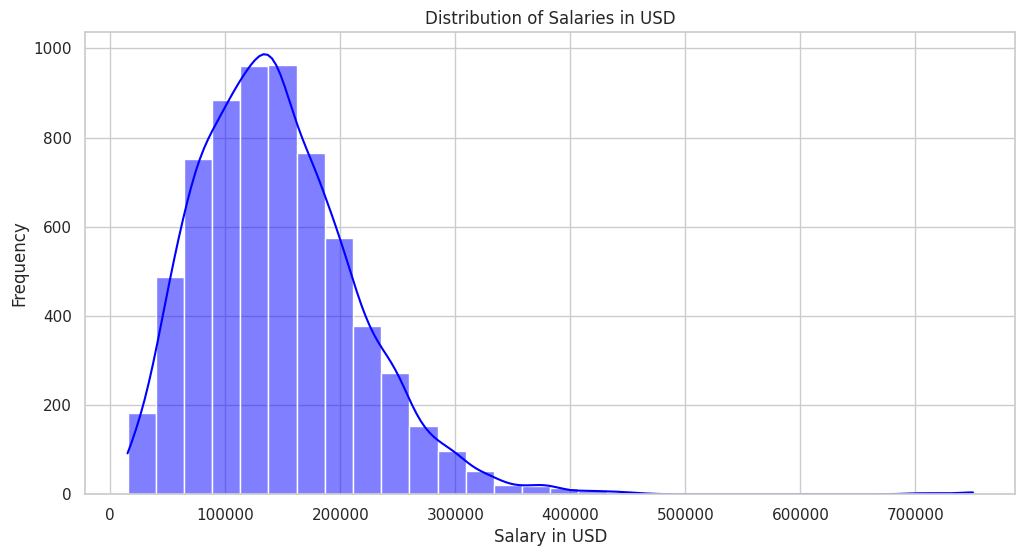

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


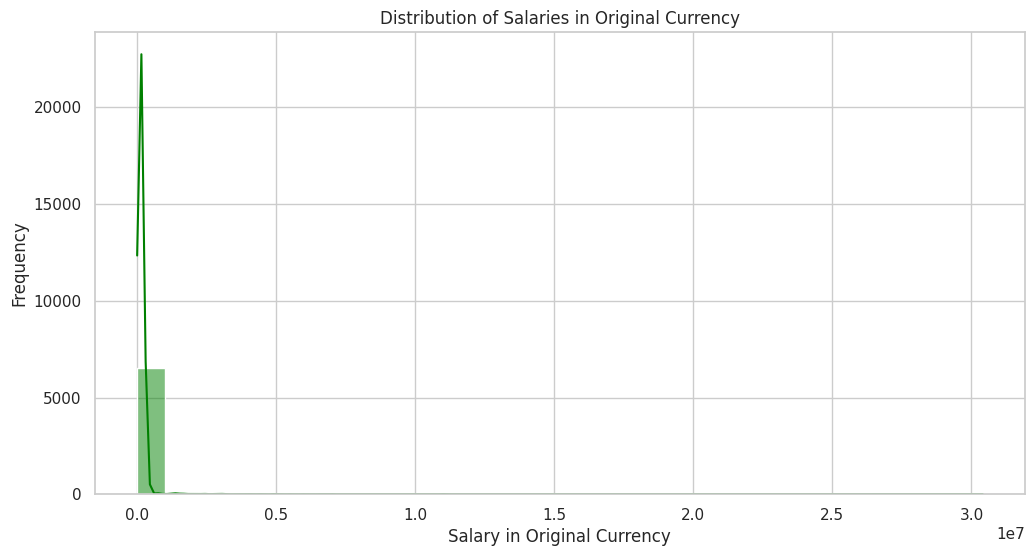

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Plotting the salary distribution in USD
plt.figure(figsize=(12, 6))
sns.histplot(data_salaries['salary_in_usd'], bins=30, kde=True, color='blue')
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

# Plotting the salary distribution in original currency
plt.figure(figsize=(12, 6))
sns.histplot(data_salaries['salary'], bins=30, kde=True, color='green')
plt.title('Distribution of Salaries in Original Currency')
plt.xlabel('Salary in Original Currency')
plt.ylabel('Frequency')
plt.show()


**Here are the visualizations of salary distributions:**

**Distribution of Salaries in USD:** This histogram shows the distribution of salaries converted to US dollars. The distribution appears right-skewed, indicating that while most data science salaries are clustered towards the lower end, there are some higher salaries stretching out the tail.

**Distribution of Salaries in Original Currency:** This visualization in the original currency also displays a right-skewed distribution. The spread and skewness might be influenced by the varying economic contexts and salary scales across different countries.



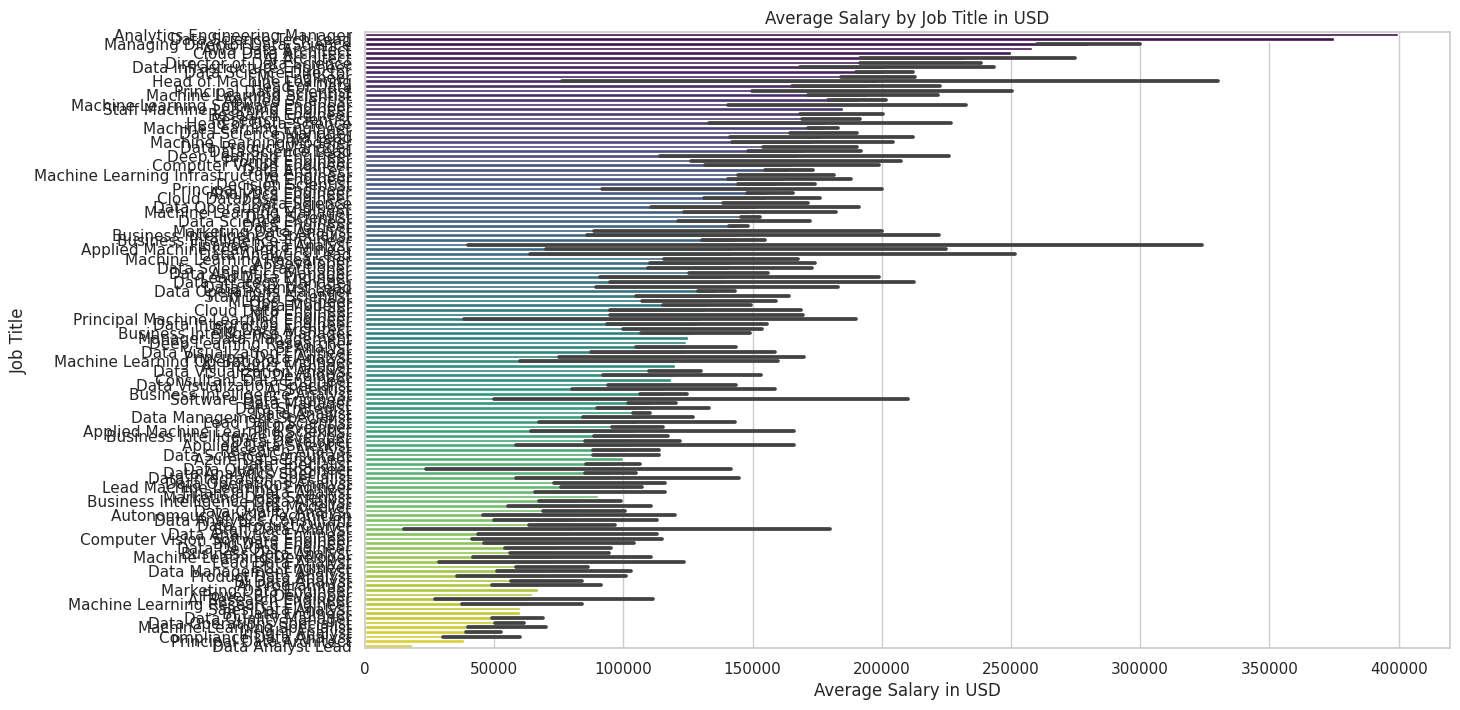

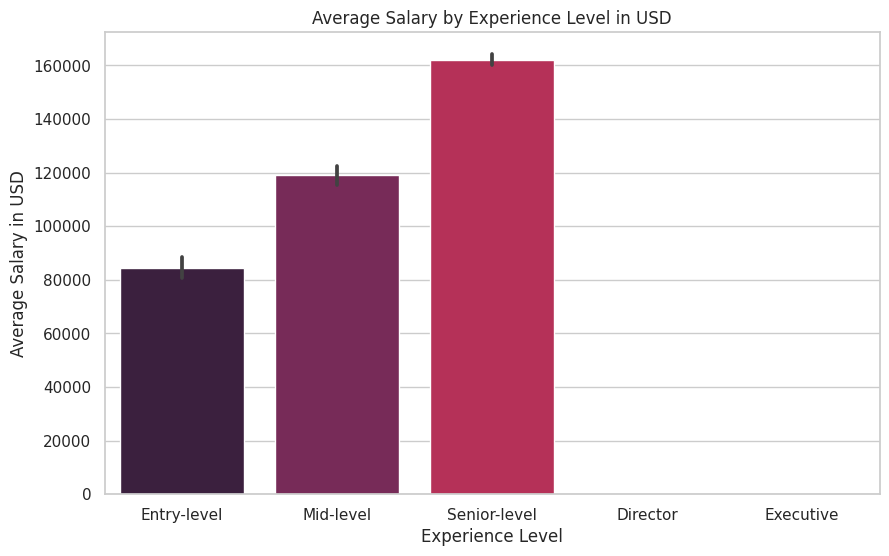

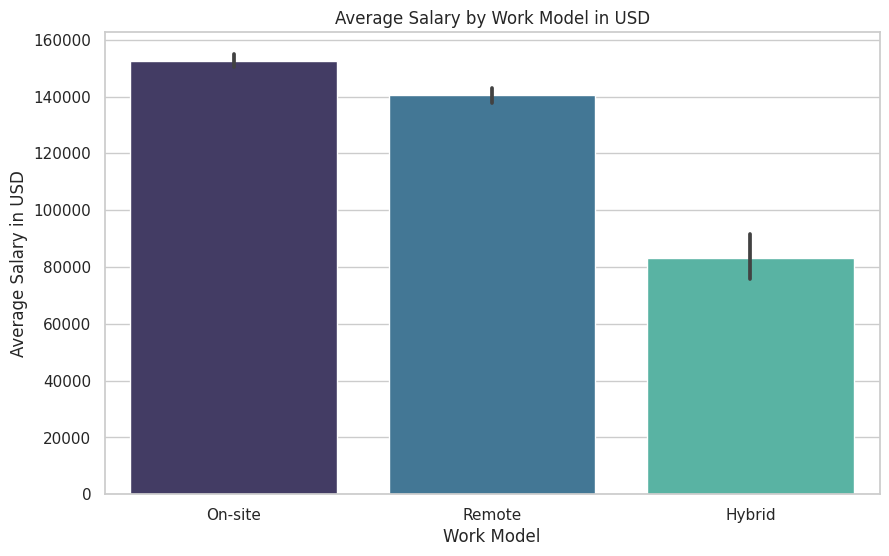

In [5]:
# Creating visualizations for average salary by job title, experience level, and work models

# Average Salary by Job Title
plt.figure(figsize=(14, 8))
job_title_order = data_salaries.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).index
sns.barplot(x='salary_in_usd', y='job_title', data=data_salaries, order=job_title_order, palette='viridis')
plt.title('Average Salary by Job Title in USD')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.show()

# Average Salary by Experience Level
plt.figure(figsize=(10, 6))
experience_order = ['Entry-level', 'Mid-level', 'Senior-level', 'Director', 'Executive']
sns.barplot(x='experience_level', y='salary_in_usd', data=data_salaries, order=experience_order, palette='rocket')
plt.title('Average Salary by Experience Level in USD')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.show()

# Average Salary by Work Models
plt.figure(figsize=(10, 6))
work_model_order = data_salaries.groupby('work_models')['salary_in_usd'].mean().sort_values(ascending=False).index
sns.barplot(x='work_models', y='salary_in_usd', data=data_salaries, order=work_model_order, palette='mako')
plt.title('Average Salary by Work Model in USD')
plt.xlabel('Work Model')
plt.ylabel('Average Salary in USD')
plt.show()


In [6]:
# Display unique job titles to check for variations that could be grouped
data_salaries['job_title'].value_counts()


job_title
Data Engineer                1307
Data Scientist               1243
Data Analyst                  910
Machine Learning Engineer     629
Analytics Engineer            246
                             ... 
Deep Learning Researcher        1
Power BI Developer              1
Marketing Data Scientist        1
AI Product Manager              1
Sales Data Analyst              1
Name: count, Length: 132, dtype: int64

In [7]:
# Clean and group job titles
def clean_job_title(title):
    if 'Data Scientist' in title or 'Research Scientist' in title or 'Applied Scientist' in title:
        return 'Data Scientist'
    elif 'Machine Learning' in title or 'ML' in title:
        return 'Machine Learning Engineer'
    elif 'Data Analyst' in title:
        return 'Data Analyst'
    elif 'BI ' in title or 'Business Intelligence' in title:
        return 'Business Intelligence Specialist'
    elif 'Data Engineer' in title:
        return 'Data Engineer'
    else:
        return title.strip()

# Apply the cleaning function to the job_title column
data_salaries['cleaned_job_title'] = data_salaries['job_title'].apply(clean_job_title)

# Calculate the average salary by job title
average_salary_by_job_title = data_salaries.groupby('cleaned_job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Display the results
average_salary_by_job_title


cleaned_job_title
Analytics Engineering Manager     399880.000000
Data Science Tech Lead            375000.000000
Managing Director Data Science    280000.000000
AWS Data Architect                258000.000000
Cloud Data Architect              250000.000000
                                      ...      
AI Research Engineer               63481.600000
Data Quality Manager               59059.000000
Data Operations Specialist         55355.000000
Insight Analyst                    46339.833333
Principal Data Architect           38154.000000
Name: salary_in_usd, Length: 77, dtype: float64

**The job titles have been cleaned and standardized, and the average salaries by these grouped job titles are calculated. Here are some examples of the top and bottom roles based on the average salary in USD:**

**Top Job Titles by Average Salary:**

Analytics Engineering Manager: $399,880

Data Science Tech Lead: $375,000

Managing Director Data Science: $280,000

AWS Data Architect: $258,000

Cloud Data Architect: $250,000

**Job Titles with Lower Average Salaries:**

AI Research Engineer: $63,482

Data Quality Manager: $59,059

Data Operations Specialist: $55,355

Insight Analyst: $46,340

Principal Data Architect: $38,154

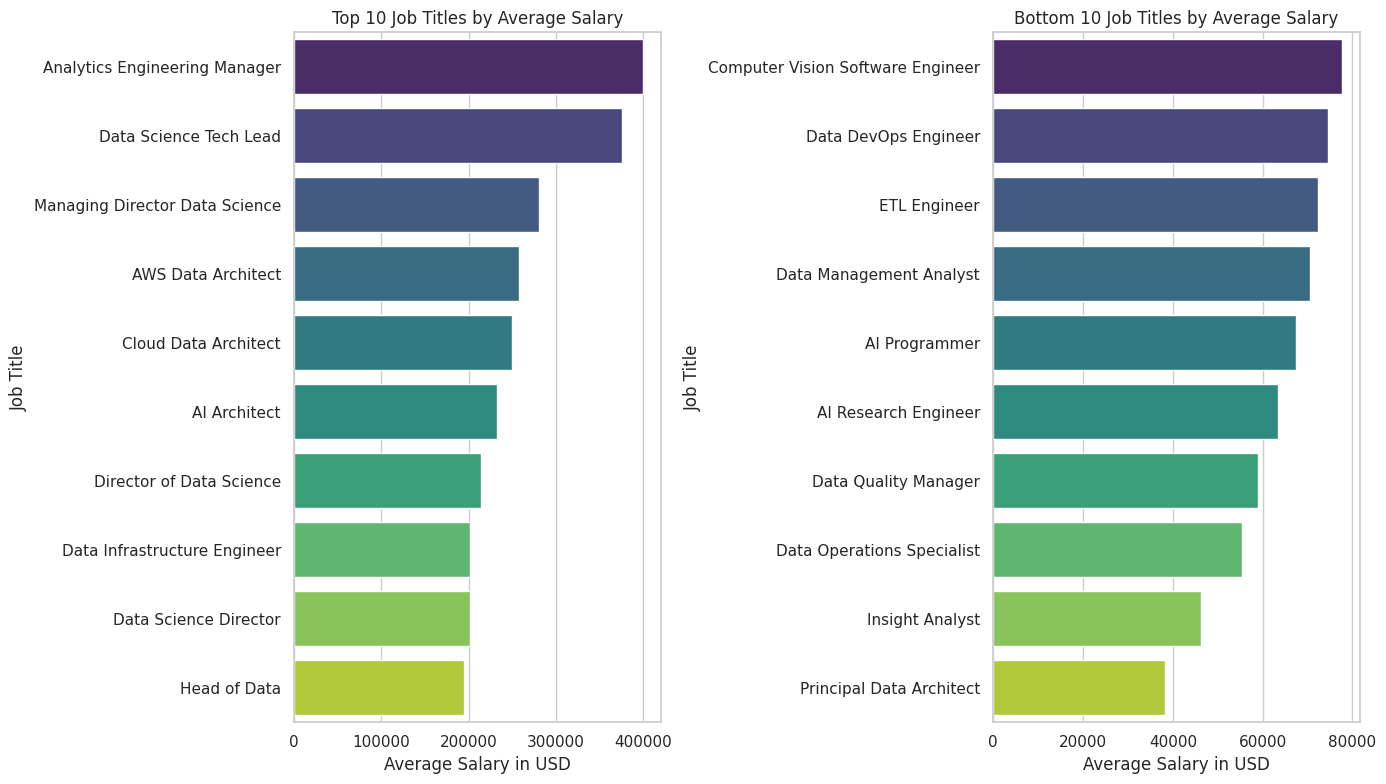

In [8]:
# Filter top 10 and bottom 10 job titles by average salary
top_10_job_titles = average_salary_by_job_title.head(10)
bottom_10_job_titles = average_salary_by_job_title.tail(10)

# Plotting
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.barplot(x=top_10_job_titles.values, y=top_10_job_titles.index, palette='viridis')
plt.title('Top 10 Job Titles by Average Salary')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')

plt.subplot(1, 2, 2)
sns.barplot(x=bottom_10_job_titles.values, y=bottom_10_job_titles.index, palette='viridis')
plt.title('Bottom 10 Job Titles by Average Salary')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')

plt.tight_layout()
plt.show()


**Here are the visualizations showing the average salaries for the top and bottom job titles:**

**Top 10 Job Titles by Average Salary:**

The graph shows the highest paying roles within data science, with roles like Analytics Engineering Manager and Data Science Tech Lead at the top, indicating high compensation levels likely due to the significant responsibilities and expertise required.

**Bottom 10 Job Titles by Average Salary:**

This graph highlights the roles with the lower average salaries, such as AI Research Engineer and Data Quality Manager. These roles may offer lower salaries due to various factors such as industry demand, location, or the specific responsibilities associated with these positions.

In [9]:
# Calculate the average salary by experience level
average_salary_by_experience = data_salaries.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)

# Display the results
average_salary_by_experience


experience_level
Executive-level    189687.346457
Senior-level       162071.063581
Mid-level          119019.812537
Entry-level         84448.916814
Name: salary_in_usd, dtype: float64

**The average salaries by experience level are as follows:**

* Executive-level: $189,687

* Senior-level: $162,071 

* Mid-level: $119,020 

* Entry-level: $84,449

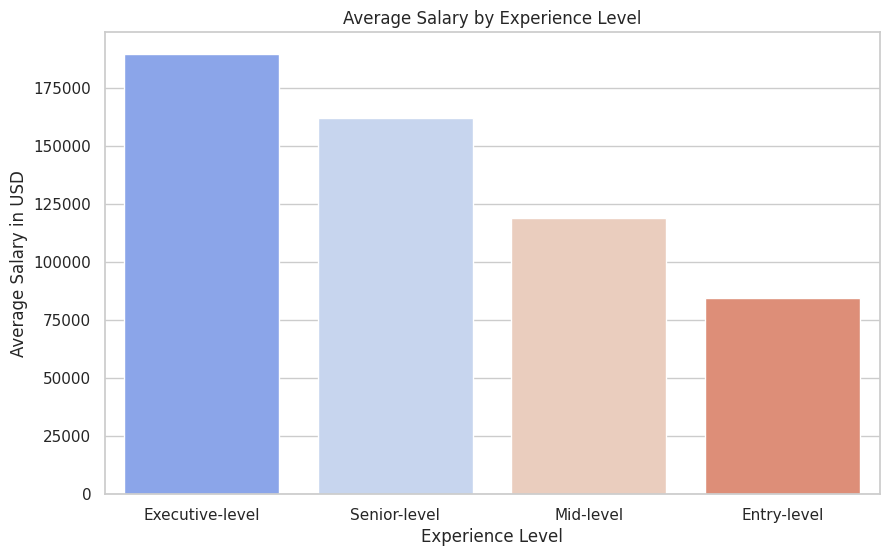

In [10]:
# Plotting average salary by experience level
plt.figure(figsize=(10, 6))
sns.barplot(x=average_salary_by_experience.index, y=average_salary_by_experience.values, palette='coolwarm')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.show()


**The bar chart clearly illustrates the average salary by experience level, depicting a steady increase in compensation as professionals advance from entry-level to executive-level positions within the data science field. This progression reflects the value of experience and the higher responsibilities taken on in more senior roles.**

In [11]:
# Calculate the average salary by employment type
average_salary_by_employment_type = data_salaries.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False)

# Calculate the average salary by work models
average_salary_by_work_model = data_salaries.groupby('work_models')['salary_in_usd'].mean().sort_values(ascending=False)

# Display the results
average_salary_by_employment_type, average_salary_by_work_model


(employment_type
 Full-time    146034.998932
 Contract     117109.368421
 Part-time     55291.062500
 Freelance     51923.166667
 Name: salary_in_usd, dtype: float64,
 work_models
 On-site    152600.100970
 Remote     140550.137837
 Hybrid      83293.502222
 Name: salary_in_usd, dtype: float64)

**Here are the average salaries by employment type and work models:**

**Average Salary by Employment Type:**

* Full-time: $146,035

* Contract: $117,109

* Part-time: $55,291

* Freelance: $51,923

> Full-time and contract roles tend to offer higher average salaries compared to part-time and freelance positions, reflecting the stability and commitments typically associated with these types of employment.

**Average Salary by Work Models:**

* On-site: $152,600

* Remote: $140,550

* Hybrid: $83,293

> Interestingly, on-site work commands the highest average salary, followed by remote work. Hybrid work models have significantly lower average salaries, which could be influenced by various factors including the type of companies offering these models and their geographical locations.



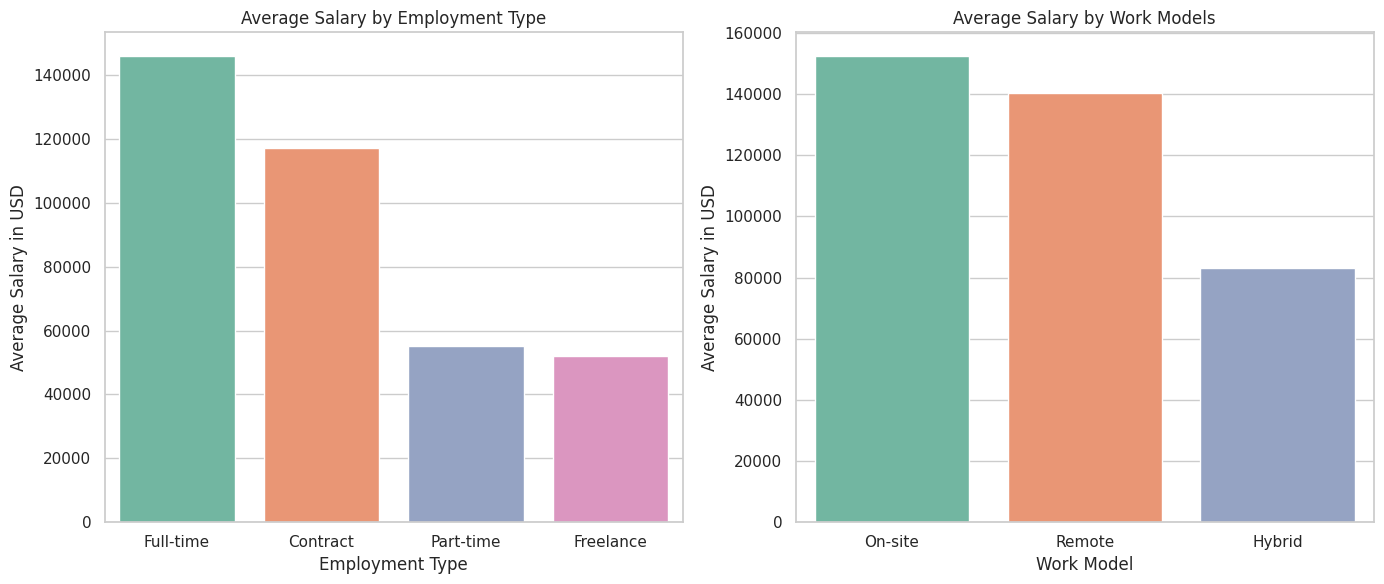

In [12]:
# Plotting
plt.figure(figsize=(14, 6))

# Average Salary by Employment Type
plt.subplot(1, 2, 1)
sns.barplot(x=average_salary_by_employment_type.index, y=average_salary_by_employment_type.values, palette='Set2')
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary in USD')

# Average Salary by Work Models
plt.subplot(1, 2, 2)
sns.barplot(x=average_salary_by_work_model.index, y=average_salary_by_work_model.values, palette='Set2')
plt.title('Average Salary by Work Models')
plt.xlabel('Work Model')
plt.ylabel('Average Salary in USD')

plt.tight_layout()
plt.show()


**The visualizations clearly display the average salaries by employment type and work models:**

**Employment Type:**

> Full-time and contract positions offer higher average salaries, reflecting the greater security and benefits associated with these types of employment. Part-time and freelance positions show significantly lower averages, which might be due to fewer hours, less job security, or the nature of the roles.

**Work Models:**

> On-site roles command the highest salaries, possibly due to the types of roles that require physical presence being more critical or higher-paying. Remote work follows closely, benefiting from broader job opportunities and competitive salaries. Hybrid models show the lowest average, which could be indicative of roles that are more flexible but possibly less critical or demanding.

In [13]:
# Calculate the average salary by employee residence, filter for top 10 most common countries
top_employee_residence_salaries = data_salaries.groupby('employee_residence')['salary_in_usd'].mean().nlargest(10)

# Calculate the average salary by company location, filter for top 10 most common locations
top_company_location_salaries = data_salaries.groupby('company_location')['salary_in_usd'].mean().nlargest(10)

# Display the results
top_employee_residence_salaries, top_company_location_salaries


(employee_residence
 Israel                    417937.000000
 Qatar                     300000.000000
 Malaysia                  200000.000000
 Puerto Rico               166000.000000
 United States             157780.939680
 New Zealand               151634.333333
 Canada                    140564.883817
 Saudi Arabia              134999.000000
 China                     125404.000000
 Bosnia and Herzegovina    120000.000000
 Name: salary_in_usd, dtype: float64,
 company_location
 Qatar                     300000.000000
 Israel                    217332.000000
 Puerto Rico               167500.000000
 United States             157073.099365
 New Zealand               151634.333333
 Canada                    139832.753086
 Saudi Arabia              134999.000000
 Ukraine                   121333.333333
 Bosnia and Herzegovina    120000.000000
 Australia                 114673.406250
 Name: salary_in_usd, dtype: float64)

**Here are the average salaries by employee residence and company location, focusing on the top 10 countries:**

**Average Salary by Employee Residence:**

* Israel: $417,937

* Qatar: $300,000

* Malaysia: $200,000

* Puerto Rico: $166,000

* United States: $157,781

* New Zealand: $151,634

* Canada: $140,565

* Saudi Arabia: $134,999

* China: $125,404

* Bosnia and Herzegovina: $120,000

**Average Salary by Company Location:**

* Qatar: $300,000

* Israel: $217,332

* Puerto Rico: $167,500

* United States: $157,073

* New Zealand: $151,634

* Canada: $139,833

* Saudi Arabia: $134,999

* Ukraine: $121,333

* Bosnia and Herzegovina: $120,000

* Australia: $114,673

> These figures indicate significant geographic disparities in salaries, reflecting the economic conditions, cost of living, and demand for data science skills in these regions.

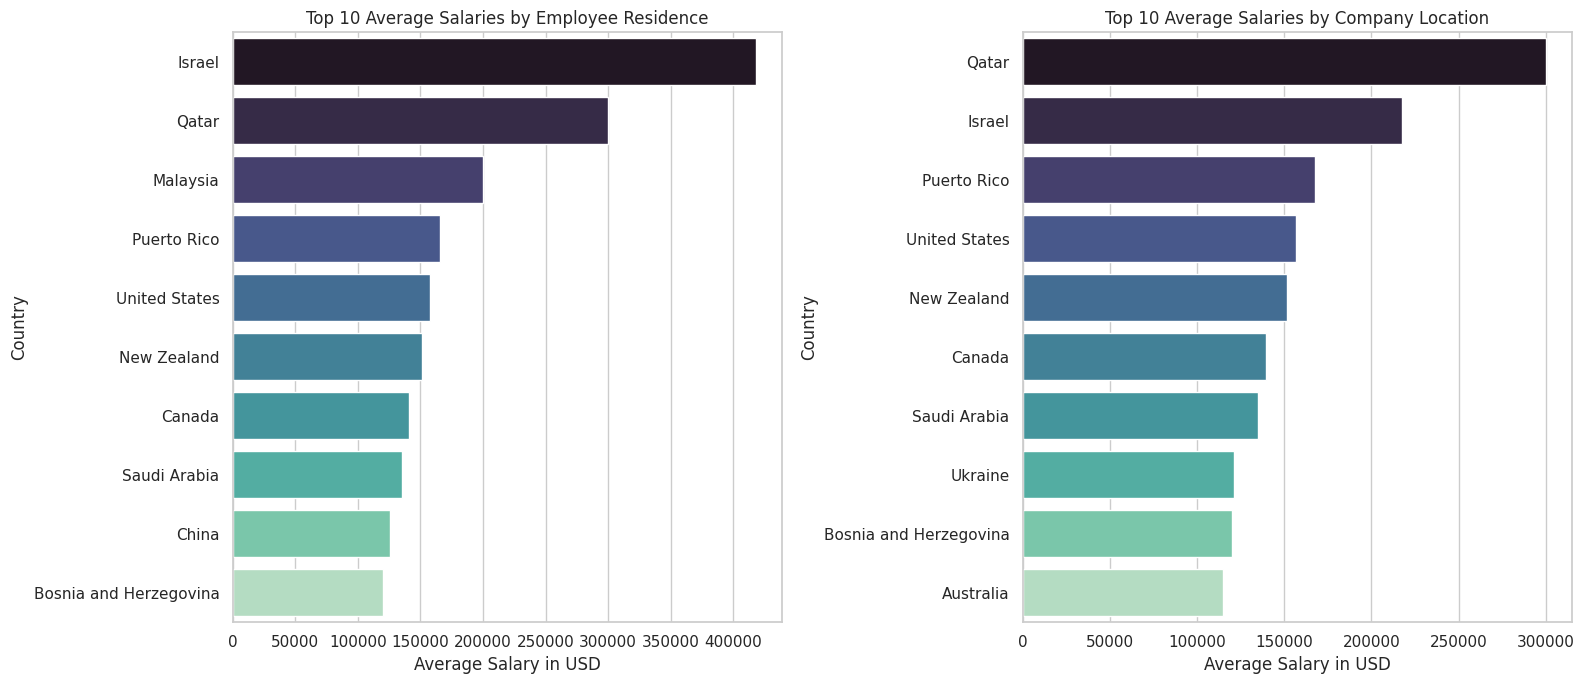

In [14]:
# Plotting
plt.figure(figsize=(16, 7))

# Average Salary by Employee Residence
plt.subplot(1, 2, 1)
sns.barplot(x=top_employee_residence_salaries.values, y=top_employee_residence_salaries.index, palette='mako')
plt.title('Top 10 Average Salaries by Employee Residence')
plt.xlabel('Average Salary in USD')
plt.ylabel('Country')

# Average Salary by Company Location
plt.subplot(1, 2, 2)
sns.barplot(x=top_company_location_salaries.values, y=top_company_location_salaries.index, palette='mako')
plt.title('Top 10 Average Salaries by Company Location')
plt.xlabel('Average Salary in USD')
plt.ylabel('Country')

plt.tight_layout()
plt.show()


**The visualizations highlight the top average salaries by both employee residence and company location:**

**Employee Residence:** Israel tops the list, followed by Qatar and Malaysia, indicating potentially high demand for data science skills or higher cost of living factors influencing salaries in these regions.

**Company Location:** Similar trends are observed here, with Qatar and Israel showing high salary averages. This suggests that companies located in these countries may be offering competitive salaries to attract skilled professionals.

In [15]:
# Calculate the average salary by company size
average_salary_by_company_size = data_salaries.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)

# Display the results
average_salary_by_company_size


company_size
Medium    149659.386689
Large     120638.404218
Small      87687.458824
Name: salary_in_usd, dtype: float64

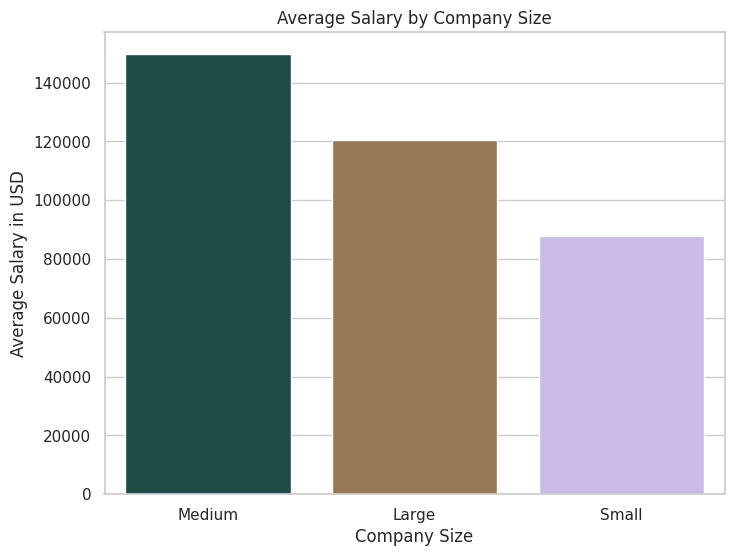

In [16]:
# Plotting average salary by company size
plt.figure(figsize=(8, 6))
sns.barplot(x=average_salary_by_company_size.index, y=average_salary_by_company_size.values, palette='cubehelix')
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
plt.show()


In [17]:
# Calculate the average salary by work year
average_salary_by_year = data_salaries.groupby('work_year')['salary_in_usd'].mean().sort_values()

# Display the results
average_salary_by_year


work_year
2021     99501.287037
2020    102250.866667
2022    131788.543165
2023    150791.420757
2024    153124.084063
Name: salary_in_usd, dtype: float64

**Here are the average salaries by work year, from 2020 to 2024:**

* 2020: $102,251

* 2021: $99,501

* 2022: $131,789

* 2023: $150,791

* 2024: $153,124


In [18]:
# Calculate the average salary by work year
average_salary_by_year = data_salaries.groupby('work_year')['salary_in_usd'].mean().sort_values()

# Display the results
average_salary_by_year


work_year
2021     99501.287037
2020    102250.866667
2022    131788.543165
2023    150791.420757
2024    153124.084063
Name: salary_in_usd, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


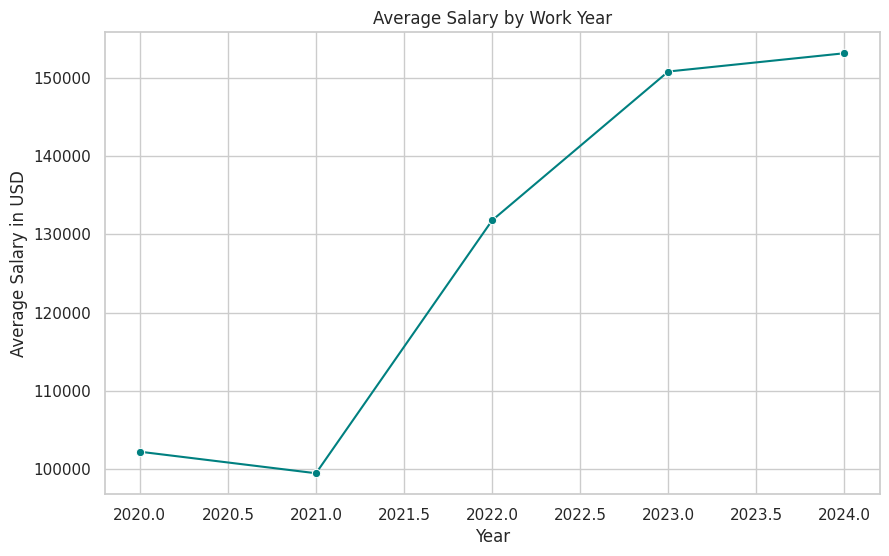

In [19]:
# Plotting average salary by work year
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_salary_by_year.index, y=average_salary_by_year.values, marker='o', color='teal')
plt.title('Average Salary by Work Year')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.grid(True)
plt.show()


**The line chart clearly shows the progression of average salaries from 2020 to 2024, highlighting a notable upward trend with a brief dip in 2021. This growth aligns with increasing recognition of the value of data science across various sectors and potentially reflects broader economic trends and sector-specific developments.**